**Цель**: применить на практике базовые ансамблевые методы

**Описание задания:**
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/file_for_hwork/main/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


*Пропусков нет, переходим на следующий шаг*



---



---



---



# 2. Подготовьте датасет к обучению моделей.
*   Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
*   Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

Нам нужно перевести следующие переменные из категориальных в цифровые:
*   Sex (пол) - get_dummies
*   ChestPainType (тип боли в груди) - get_dummies
*   RestingECG (кровяное давление) - get_dummies
*   ExerciseAngina (стенакордия) - LabelEncoder, N=0, Y=1
*   ST_Slope - get_dummies


In [5]:
df_transform = df.copy()

In [6]:
df_transform = pd.get_dummies(df_transform, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], drop_first= False )

In [7]:
my_label = preprocessing.LabelEncoder()
df_transform[ 'ExerciseAngina' ]= my_label.fit_transform(df_transform[ 'ExerciseAngina' ])

In [8]:
df_transform.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0.0,0,0,1,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,0,1.0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1


Теперь построим графики:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

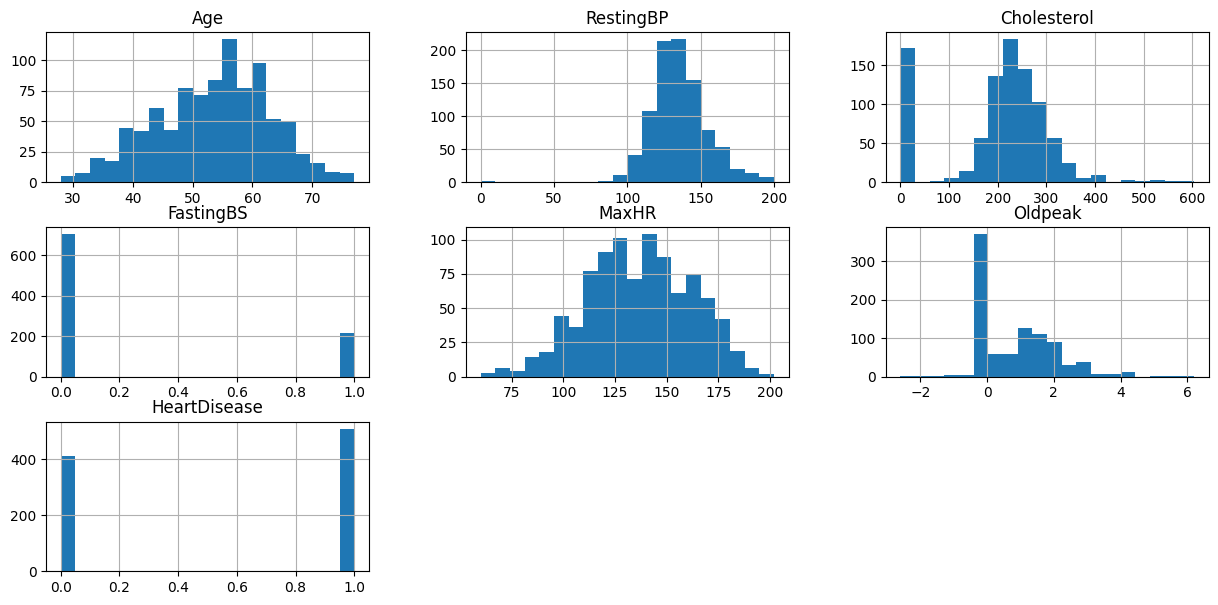

In [ ]:
df.hist(bins=20, figsize=(15,7))

*Что мы можем сказать о наших данных:*
*   большая часть строк имеют показатель Age от 40 до 65 (примерно)
*   кровяное давление RestingBP у большинства находится от 100 до 150
*   Cholesterol возможно есть неверные данные, так как 0 холестирина в крови у 172 человек
*   Уровень сахара в крови FastingBS у большинства в норме (0)
*   Максимальная частота сердечных сокращений MaxHR у большинства по выборке в диапазоне 100-175
*   Самый часто встречающийся показатель Oldpeak от -0,3 до 0
*   HeartDisease больше половины выборки имеют болезни сердца

Посмотрим боксплот по колонке Cholesterol:

Text(0.5, 1.0, 'Cholesterol')

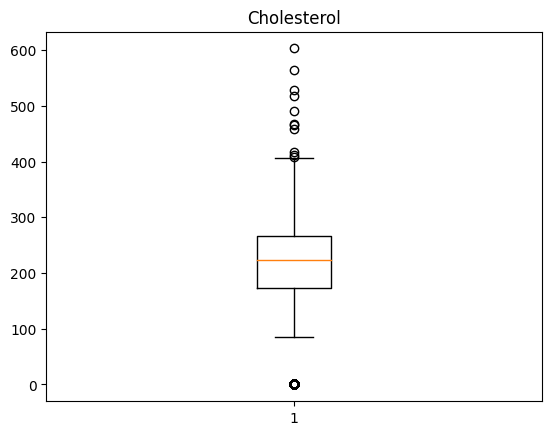

In [ ]:
plt.boxplot(df['Cholesterol'])
plt.title('Cholesterol')

*Да, значения менее 80 (примерно) и более 420 (примерно) определяются как выбросы. На текущий момент мы не будем их удалять, так как они могут быть "ложными"*



---



---



---



# 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [9]:
X = df_transform.drop(['HeartDisease'], axis=1)
y = df_transform['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)



---



---



---



# 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
*   tree.DecisionTreeClassifier
*   ensemble.RandomForestClassifier

**DecisionTreeClassifier**

In [ ]:
model_1 = DecisionTreeClassifier(random_state=1)

model_1.fit(X_train, y_train)
pred_train_1 = model_1.predict(X_train)
pred_test_1 = model_1.predict(X_test)

print(f'Качество на обучающей выборке: {balanced_accuracy_score(y_train, pred_train_1)}')
print(f'Качество на валидационной выборке: {balanced_accuracy_score(y_test, pred_test_1)}')

Качество на обучающей выборке: 1.0
Качество на валидационной выборке: 0.770205643232903


In [ ]:
model_1.get_depth()

14

*Дерево глубиной 14. Хорошо отработало на обучающей выборке и хуже на тестовой*

**RandomForestClassifier**

In [ ]:
model_2 = RandomForestClassifier(random_state=1)

model_2.fit(X_train, y_train)
pred_train_2 = model_2.predict(X_train)
pred_test_2 = model_2.predict(X_test)

print(f'Качество на обучающей выборке: {balanced_accuracy_score(y_train, pred_train_2)}')
print(f'Качество на валидационной выборке: {balanced_accuracy_score(y_test, pred_test_2)}')

Качество на обучающей выборке: 1.0
Качество на валидационной выборке: 0.8937111429937828


*RandomForestClassifier на обучающей выборке отработал идеально, на тестовой хуже, но если сравнивать показатели с DecisionTreeClassifier, то лес однозначно работает лучше*



---



---



---



# 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

**DecisionTreeClassifier**

In [ ]:
print(classification_report(y_test, pred_test_1))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        82
           1       0.80      0.78      0.79       102

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



**RandomForestClassifier**

In [ ]:
print(classification_report(y_test, pred_test_2))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



*Как и было сказано ранее, модель RandomForestClassifier отрабатывет лучше на тестовой выборке, в отличии от DecisionTreeClassifier*



---



---



---



# 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

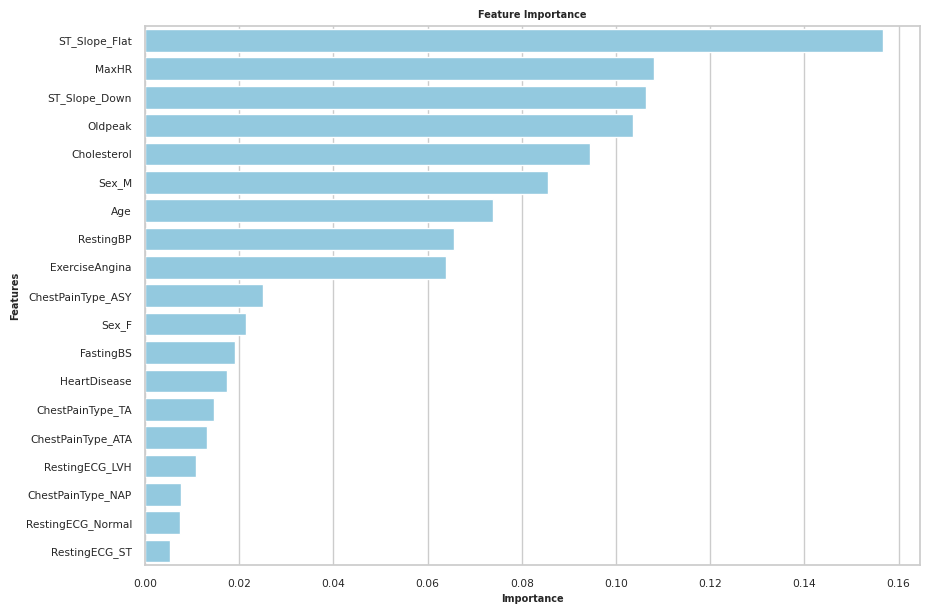

None

In [ ]:
feats = {}
for feature, importance in zip(df_transform.columns, model_2.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 1)
sns.set(style="whitegrid", color_codes=True, font_scale = 0.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=7, weight = 'bold')
plt.ylabel('Features', fontsize=7, weight = 'bold')
plt.title('Feature Importance', fontsize=7, weight = 'bold')
display(plt.show())
#display(importances)

*Из диаграммы мы видим, что самый важный признак ST_Slope_Flat. За ним уже по важности идут MaxHR, ST_Slope_Down, Oldpeak, Cholesterol, Sex_M, Age, RestingBP, ExerciseAngina и так далее*



---



---



---



# 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
*   Повторите п. 5

In [ ]:
modelClf = BaggingClassifier(estimator=model_1, n_estimators=50, random_state=12)
modelClf.fit(X_train, y_train)
pred_test_Clf = modelClf.predict(X_test)



print(modelClf.score(X_test, y_test))

0.8586956521739131


In [ ]:
print(classification_report(y_test, pred_test_Clf))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



*Эта модель отработала чучше, чем DecisionTreeClassifier*



---



---



---



# 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
*   Повторите п. 5

In [ ]:
X = df_transform.drop(['HeartDisease'], axis=1)
y = df_transform['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

In [ ]:
estimators = [
              ('dt', DecisionTreeClassifier(random_state=1)),
              ('rf', RandomForestClassifier(random_state=1)),
              ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42, max_iter=2000)))]

model_est = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model_est.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=1)),
                               ('rf', RandomForestClassifier(random_state=1)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(max_iter=2000,
                                                           random_state=42))]))],
                   final_estimator=LogisticRegression())

In [ ]:
pred_test_est = model_est.predict(X_test)
print(classification_report(y_test, pred_test_est))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        82
           1       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



В целом, эта модель работает, качество ее можно оценить как высокое.



---



---



---



# 9. Сформулируйте выводы по проделанной работе.
*   Сравните метрики построенных моделей.
*   Напишите свое мнение, какая модель наилучшая и почему.

Мы можем говорить, что модель RandomForestClassifier отработала лучше остальных, но разница не критична. Хуже всех отработала модель DecisionTreeClassifier, и разница более значительна, если сравнивать с остальными моделями, но это отдельная модель, а не какой-то "набор". Если рассматривать в порядке убывания accuracy, то получим следующее: RandomForestClassifier, StackingClassifier, BaggingClassifier и DecisionTreeClassifier


*Подводя итог, нельзя говорить какая модель однозначно лучше остальных, так как модели RandomForestClassifier, StackingClassifier отработали примерно на одном уровне, чуть хуже показала себя модель BaggingClassifier и на "последнем месте" DecisionTreeClassifier.* На мой взгляд нужно сначала разобраться с выбросами по выборке - понять ложные они или нет.